In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

# 初始化
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
    
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [4]:
# 损失函数
loss = nn.CrossEntropyLoss(reduction='none')

In [5]:
# 优化函数
trainer = torch.optim.SGD(net.parameters(), lr=0.06)

In [6]:
# 计算准确率
def accuracy_score(data_iter):
    net.eval()
    ac_cnt, cnt = 0, 0
    for X, y in data_iter:
        y_hat = net(X).argmax(axis=1)
        ac_cnt += (y_hat == y).sum()
        cnt += y.numel()
    return ac_cnt / cnt

In [7]:
# 模型训练
def train_model(num_epochs):
    for epoch in range(num_epochs):
        net.train()
        for X, y in train_iter:
            l = loss(net(X), y)
            trainer.zero_grad()
            l.sum().backward()
            trainer.step()
        ac_score = accuracy_score(train_iter)
        print(f'iter {epoch+1}, accuracy: {ac_score:.3f}')

num_epochs = 10
train_model(num_epochs)

iter 1, accuracy: 0.736
iter 2, accuracy: 0.830
iter 3, accuracy: 0.798
iter 4, accuracy: 0.849
iter 5, accuracy: 0.800
iter 6, accuracy: 0.817
iter 7, accuracy: 0.801
iter 8, accuracy: 0.832
iter 9, accuracy: 0.821
iter 10, accuracy: 0.839


In [8]:
# 模型测试
ac_test = accuracy_score(test_iter)
print(f'test accuracy: {ac_test:.3f}')

test accuracy: 0.819


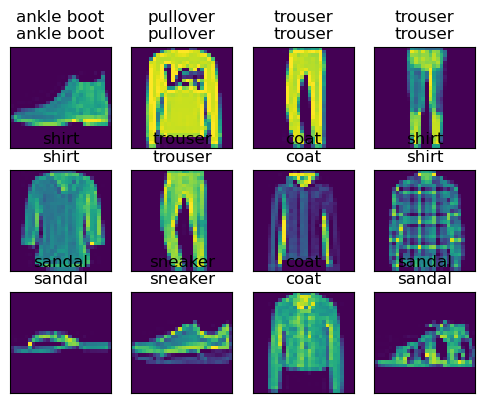

In [9]:
# 结果展示
def predict_model(net, test_iter, num_rows=1, num_cols=6):
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:num_rows*num_cols].reshape((num_rows*num_cols, 28, 28)), num_rows, num_cols, titles=titles[0:num_rows*num_cols])

predict_model(net, test_iter, 3, 4)